In [3]:
# Load the CSV file into a DataFrame
predictive_df = pd.read_csv('../data\predictive_df.csv')
filtered_df = pd.read_csv('../data\\filtered_df.csv')
target_column = filtered_df['ICU']

# Loading the correlations dictionary from the file
with open('../data//correlations.pkl', 'rb') as file:
    correlations = pickle.load(file)

In [4]:
import pandas as pd
import pickle 

In [5]:
target_column.head(5)

0    0
1    0
2    0
3    0
4    0
Name: ICU, dtype: int64

In [6]:
import numpy as np
import pandas as pd

# Create an empty DataFrame to store columns with nominal values
predictive_cat_df = pd.DataFrame()

# Iterate over the columns in the filtered dataframe
for column in predictive_df.columns:
    col_data = predictive_df[column]
    
    if set(col_data.dropna().unique()) == {0, 1}:
        predictive_cat_df[column] = col_data  # Add the column to the new DataFrame

In [7]:
predictive_cat_df.head(5)

,Sesso,Nazionalità,Domicilio,Profilassi,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,...,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0


In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD

In [9]:
# Step 1: Compute Covariance Matrix
XCov = predictive_cat_df.cov()

In [10]:
# Step 2: Perform Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=3)  # Set the desired latent dimension to 3
svd.fit(XCov)
V = svd.components_  # Latent vectors
sigma_squared = svd.singular_values_**2  # Squared singular values

In [11]:
XCov.head(5)

,Sesso,Nazionalità,Domicilio,Profilassi,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,...,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina
Sesso,0.229851,-0.010759,0.000587,0.009781,0.016236,-0.006847,-0.022692,0.005477,-0.003717,-0.031690,...,0.014671,0.017997,0.032668,2.112676e-02,0.001174,0.026800,-0.017801,0.023083,-0.012911,0.004890
Nazionalità,-0.010759,0.248631,0.018192,-0.016041,0.043232,0.022496,0.024257,0.010172,-0.011933,0.031690,...,0.004108,-0.000782,0.003326,-2.112676e-02,-0.005869,0.018584,0.016236,0.020736,0.008216,0.006064
Domicilio,0.000587,0.018192,0.040493,-0.001174,0.007629,-0.007629,-0.002347,-0.002347,-0.002934,-0.003521,...,-0.001761,-0.025822,-0.027582,-2.112676e-02,-0.003521,0.004108,-0.002934,-0.012911,-0.003521,-0.000587
Profilassi,0.009781,-0.016041,-0.001174,0.027387,-0.013693,-0.005086,-0.001565,-0.001565,-0.001956,-0.007042,...,-0.001174,-0.003130,-0.004304,-6.841163e-19,-0.002347,0.007433,-0.001956,0.005477,-0.002347,-0.000391
Comorbilità,0.016236,0.043232,0.007629,-0.013693,0.253326,0.094092,0.028951,0.028951,-0.006064,0.010563,...,-0.020540,0.036776,0.016236,7.042254e-03,0.001174,0.052621,0.008020,0.018388,0.043427,0.007238


In [12]:
sigma_squared

array([0.55129576, 0.17679891, 0.10986679])

In [13]:
V

array([[ 0.10843845, -0.01696565, -0.05838416, -0.00217126,  0.12424391,
         0.07382602, -0.0306956 ,  0.00812936, -0.01192349, -0.03084579,
         0.08241435,  0.00860716,  0.05555562, -0.14690129,  0.05339414,
        -0.00542955,  0.03950507, -0.12758454,  0.01348487, -0.02035011,
         0.02035011,  0.15753339, -0.03847533,  0.53268831,  0.49421297,
         0.51507218, -0.1426052 ,  0.15142018, -0.02400627,  0.20573068,
         0.04593318,  0.02035011],
       [-0.05233108,  0.48674644,  0.04151873, -0.04920957,  0.48954158,
         0.25130254,  0.09830978,  0.04382672, -0.09315895,  0.32967013,
        -0.19357196,  0.02426032, -0.01978462, -0.06918793, -0.10722805,
        -0.07006155, -0.071231  , -0.16868092, -0.25583443, -0.03390293,
         0.03390293, -0.17398101,  0.00509956, -0.03157829, -0.02647874,
        -0.14309749,  0.04671801,  0.22670553,  0.04482662,  0.21067125,
         0.09966428,  0.03390293],
       [ 0.09847906, -0.06578083,  0.01407082,  0.0411

In [14]:
# Step 3: Encode the First Sample
first_sample = predictive_cat_df.iloc[4]  # Assuming the first sample is at index 0

# Multiply the transformed sample by the matrix V to obtain latent vectors
latent_vectors = np.dot(first_sample, V.T)

# Print the encoded latent vectors
print("Encoded Latent Vectors:")
print(latent_vectors)


Encoded Latent Vectors:
[ 1.67567596 -0.17812644 -0.04522594]


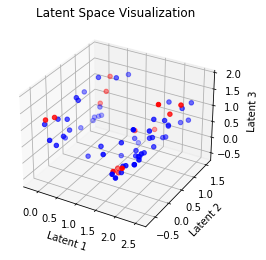

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Loop through the DataFrame and calculate latent vectors
latent_vectors_list = []
colors = []  # To store the colors for the scatter plot

for i in range(len(predictive_cat_df)):
    sample = predictive_cat_df.iloc[i]
    latent_vector = np.dot(sample, V.T)
    latent_vectors_list.append(latent_vector)
    
    if i in filtered_df.index and filtered_df.loc[i, 'ICU'] == 1:
        colors.append('red')  # Corresponding sample in filtered_df has 'ICU' value set to 1
    else:
        colors.append('blue')  # Corresponding sample in filtered_df does not have 'ICU' value set to 1

# Convert the list of latent vectors into a NumPy array
latent_vectors = np.array(latent_vectors_list)

# Plot the latent vectors in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all latent vectors
ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], latent_vectors[:, 2], color=colors)

# Set labels and title for the plot
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.set_zlabel('Latent 3')
ax.set_title('Latent Space Visualization')

# Show the plot
plt.show()


***Then we should merge this with the numerical datas***

In [16]:
import pandas as pd

# Create a new DataFrame with latent vectors
latent_df = pd.DataFrame(latent_vectors, columns=['Latent 1', 'Latent 2', 'Latent 3'])

# Get the remaining features from predictive_df
remaining_features_df = predictive_df.drop(predictive_cat_df.columns, axis=1)

# Merge latent_df with the remaining features
merged_df = pd.concat([latent_df, remaining_features_df], axis=1)

In [17]:
merged_df.head(5)

,Latent 1,Latent 2,Latent 3,Età,Altezza,Peso,Numerocriteri,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,...,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,DurataArtesunato
0,-0.102328,0.776901,-0.002133,57,160,55.0,1,117137,1.0,7,...,0.475355,136,3.4,8.400000,1.15,498,7.488156,29.354149,1.961553,2
1,-0.193801,0.342485,-0.034832,62,159,70.0,1,37694,1.0,7,...,0.779619,140,3.9,9.400000,1.19,469,7.471427,29.661985,2.386043,4
2,1.994253,-0.165400,0.305186,72,175,83.0,1,7,0.2,2,...,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1
3,2.052544,-0.083588,0.406235,53,177,96.0,2,572000,12.0,7,...,1.020000,122,3.5,8.520905,1.10,407,7.459404,25.057969,2.728105,4
4,1.675676,-0.178126,-0.045226,58,160,64.3,1,602100,13.5,7,...,1.428358,135,3.9,8.849885,1.10,455,7.460937,26.638637,2.363897,1


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features in merged_df
normalized_df = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)

In [19]:
normalized_df.head(5)

,Latent 1,Latent 2,Latent 3,Età,Altezza,Peso,Numerocriteri,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,...,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,DurataArtesunato
0,0.033326,0.657854,0.228539,0.587302,0.250,0.190141,0.0,0.104116,0.045411,0.461538,...,0.023170,0.56,0.296296,0.404762,0.234234,0.505777,0.783983,0.932958,0.352311,0.166667
1,0.000000,0.461345,0.215166,0.666667,0.225,0.366197,0.0,0.033500,0.045411,0.461538,...,0.041952,0.72,0.481481,0.642857,0.270270,0.468549,0.714281,0.952691,0.437209,0.500000
2,0.797172,0.231601,0.354229,0.825397,0.625,0.518779,0.0,0.000000,0.009046,0.076923,...,0.016049,0.68,0.518519,0.340476,0.189189,0.340180,0.458333,1.000000,0.480000,0.000000
3,0.818409,0.268609,0.395557,0.523810,0.675,0.671362,0.2,0.508441,0.545434,0.461538,...,0.056790,0.00,0.333333,0.433549,0.189189,0.388960,0.664185,0.657562,0.505621,0.500000
4,0.681105,0.225845,0.210915,0.603175,0.250,0.299296,0.0,0.535197,0.613619,0.461538,...,0.081997,0.52,0.481481,0.511877,0.189189,0.450578,0.670569,0.758887,0.432779,0.000000


***The problem is that the further we go from the original datas, the less informations for the doctors***

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, input_dim, embedded_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, embedded_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Set the input and embedded dimensions
input_dim = normalized_df.shape[1]
embedded_dim = 3

# Create an instance of the network
model = Net(input_dim, embedded_dim)


In [21]:
import torch
from torch.utils.data import Dataset, DataLoader

# Custom dataset class
class MyDataset(Dataset):
    def __init__(self, dataframe, target_column):
        self.data = torch.tensor(dataframe.values, dtype=torch.float32)
        self.targets = torch.tensor(target_column.values, dtype=torch.float32)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

# Create an instance of your custom dataset
dataset = MyDataset(normalized_df, target_column)

# Define the batch size
batch_size = len(normalized_df)

# Create the data loader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)


In [22]:
import torch.optim.lr_scheduler as lr_scheduler
import torch
import torch.nn as nn
import torch.optim as optim

In [23]:
# Convert the normalized_df dataframe to a PyTorch tensor
data = torch.tensor(normalized_df.values, dtype=torch.float32)

targets = torch.tensor(target_column.values, dtype=torch.float32)


In [24]:
# Define the loss function
def model_loss(distance_matrix, targets, lambda_reg = 0.0):

    pospos_sum_dist = 0
    posneg_sum_dist = 0
    negneg_sum_dist = 0

    for i in range(len(distance_matrix)) : 
        for j in range(len(distance_matrix)) : 
            if i != j : 
                if targets[i] == 1 or targets[j] == 1 : 
                    if targets[i] == 1 and targets[j] == 1 : #pos pos
                        pospos_sum_dist += distance_matrix[i][j]
                    else : # pos/neg ou neg/pos
                        posneg_sum_dist += distance_matrix[i][j]
                else :
                    negneg_sum_dist += distance_matrix[i][j]   
    
    distance_loss = pospos_sum_dist + posneg_sum_dist - posneg_sum_dist 
    
    regularization_loss = 0
    for param in model.parameters():
        regularization_loss += torch.sum(torch.square(param))

    # print('distance_loss ='+str(distance_loss))
    # print('lambda_reg * regularization_loss ='+str(lambda_reg * regularization_loss))
    return distance_loss + lambda_reg * regularization_loss

In [25]:
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define the learning rate scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

# Training loop
epochs = 250
for epoch in range(epochs):

    # Compute les embeddings

    # Create an empty tensor to store the embeddings
    embeddings = torch.empty((data.shape[0], embedded_dim))

    total_loss = 0

    for i in range(data.shape[0]):
        sample = data[i]
        embedded_sample = model(sample)
        embeddings[i] = embedded_sample

    distance_matrix = torch.cdist(embeddings, embeddings, p=2)

    optimizer.zero_grad()
    
    # Compute la matrice de distance 

    loss = model_loss(distance_matrix, targets) 
    loss.backward()
    total_loss += loss.item()
    optimizer.step()

    # Update the learning rate based on the validation loss
    val_loss = total_loss / data.shape[0]
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {val_loss}")


Epoch 1/250, Loss: 0.053386317359076604
Epoch 2/250, Loss: 0.0679202609592014
Epoch 3/250, Loss: 0.026024368074205186
Epoch 4/250, Loss: 0.01980757713317871
Epoch 5/250, Loss: 0.015567408667670356
Epoch 6/250, Loss: 0.007608155409495036
Epoch 7/250, Loss: 0.004859156078762478
Epoch 8/250, Loss: 0.005236903826395671
Epoch 9/250, Loss: 0.004495018058353
Epoch 10/250, Loss: 0.003491610288619995
Epoch 11/250, Loss: 0.0037182768185933432
Epoch 12/250, Loss: 0.003358708487616645
Epoch 13/250, Loss: 0.0026820533805423314
Epoch 14/250, Loss: 0.002041490541564094
Epoch 15/250, Loss: 0.001954779028892517
Epoch 16/250, Loss: 0.0017444209920035468
Epoch 17/250, Loss: 0.0015225062767664592
Epoch 18/250, Loss: 0.0015256371763017443
Epoch 19/250, Loss: 0.0009671060575379266
Epoch 20/250, Loss: 0.0011188412706057231
Epoch 21/250, Loss: 0.0011956666906674702
Epoch 22/250, Loss: 0.0007524879442320929
Epoch 23/250, Loss: 0.0009664793809254965
Epoch 24/250, Loss: 0.000969170696205563
Epoch 25/250, Loss: 0

Epoch 185/250, Loss: 2.2070534113380645e-06
Epoch 186/250, Loss: 3.6027696397569444e-06
Epoch 187/250, Loss: 1.527394892440902e-06
Epoch 188/250, Loss: 3.0547639148102867e-06
Epoch 189/250, Loss: 4.220365857084592e-06
Epoch 190/250, Loss: 2.9927016132407716e-06
Epoch 191/250, Loss: 4.008438231216536e-06
Epoch 192/250, Loss: 3.1243802772627937e-06
Epoch 193/250, Loss: 4.096215383874045e-06
Epoch 194/250, Loss: 3.493675548169348e-06
Epoch 195/250, Loss: 4.535592678520415e-06
Epoch 196/250, Loss: 1.6954210069444444e-06
Epoch 197/250, Loss: 3.328779712319374e-06
Epoch 198/250, Loss: 3.0547639148102867e-06
Epoch 199/250, Loss: 2.375105395913124e-06
Epoch 200/250, Loss: 3.4786191665463976e-06
Epoch 201/250, Loss: 4.096215383874045e-06
Epoch 202/250, Loss: 3.0804787658982805e-06
Epoch 203/250, Loss: 3.8661269678009885e-06
Epoch 204/250, Loss: 3.416556864976883e-06
Epoch 205/250, Loss: 3.88428775800599e-06
Epoch 206/250, Loss: 1.8452863312429852e-06
Epoch 207/250, Loss: 2.9049244605832628e-06


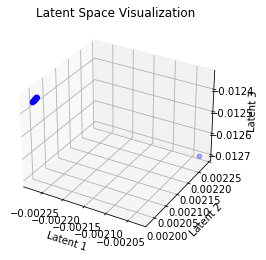

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Encode the data using the trained model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Create an empty tensor to store the embeddings
    embeddings = torch.empty((data.shape[0], embedded_dim))

    total_loss = 0

    for i in range(data.shape[0]):
        sample = data[i]
        embedded_sample = model(sample)
        embeddings[i] = embedded_sample

colors = []
for i in range(len(normalized_df)):
    if target_column[i] == 1:
        colors.append('red')  # Corresponding sample in filtered_df has 'ICU' value set to 1
    else:
        colors.append('blue')  # Corresponding sample in filtered_df does not have 'ICU' value set to 1

# Convert the embeddings tensor to a NumPy array
latent_vectors = embeddings.numpy()

# print(latent_vectors)

# Step 2: Plot the latent vectors in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all latent vectors
ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], latent_vectors[:, 2], color=colors)

# Set labels and title for the plot
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.set_zlabel('Latent 3')
ax.set_title('Latent Space Visualization')

# Show the plot
plt.show()


In [27]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pythreejs import *
from IPython.display import display

# Step 1: Encode the data using the trained model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Create an empty tensor to store the embeddings
    embeddings = torch.empty((data.shape[0], embedded_dim))

    total_loss = 0

    for i in range(data.shape[0]):
        sample = data[i]
        embedded_sample = model(sample)
        embeddings[i] = embedded_sample

colors = []
for i in range(len(normalized_df)):
    if target_column[i] == 1:
        colors.append('red')  # Corresponding sample in filtered_df has 'ICU' value set to 1
    else:
        colors.append('blue')  # Corresponding sample in filtered_df does not have 'ICU' value set to 1

# Convert the embeddings tensor to a NumPy array
latent_vectors = embeddings.numpy()

# Step 2: Create a Three.js scene
scene = Scene()

# Create a WebGLRenderer
renderer = Renderer(camera=PerspectiveCamera(position=[10, 10, 10], aspect=1.0))
renderer.width = "800px"
renderer.height = "600px"

# Create geometry and material for the 3D scatter plot
geometry = BufferGeometry(attributes={
    'position': BufferAttribute(array=latent_vectors.flatten(), itemSize=3),
    'color': BufferAttribute(array=np.array([colors]).flatten().view(dtype=[
        ('r', np.float32),
        ('g', np.float32),
        ('b', np.float32)
    ]), itemSize=3)
})
material = PointsMaterial(vertexColors='VertexColors', size=0.1)

# Create a Points object and add it to the scene
points = Points(geometry=geometry, material=material)
scene.add(points)

# Add controls for zoom and pan
controls = OrbitControls(controlling=renderer.camera, target=Vector3(0, 0, 0))
scene.add(controls)

# Display the renderer in an HTML page
display(renderer)

# Render the scene
renderer.render(scene, renderer.camera)


html_content = renderer.to_html()
with open('visualization.html', 'w') as f:
    f.write(html_content)

AttributeError: type object 'DataImage' has no attribute '_instance_inits'